[20220817]

# 2. Model 1

Auto arima

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation
        
## source

* https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
* https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pmdarima
import joblib
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 
from ramal import eval_model

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_0'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
# df = pd.read_csv(PATH_INTERIM + 'daily-min-temp3_iter0.csv')
# df.set_index('Date',inplace=True)

In [4]:
# ! pip install pmdarima

In [5]:
ts2 = joblib.load(PATH_MODEL+'ramal_1.pkl')

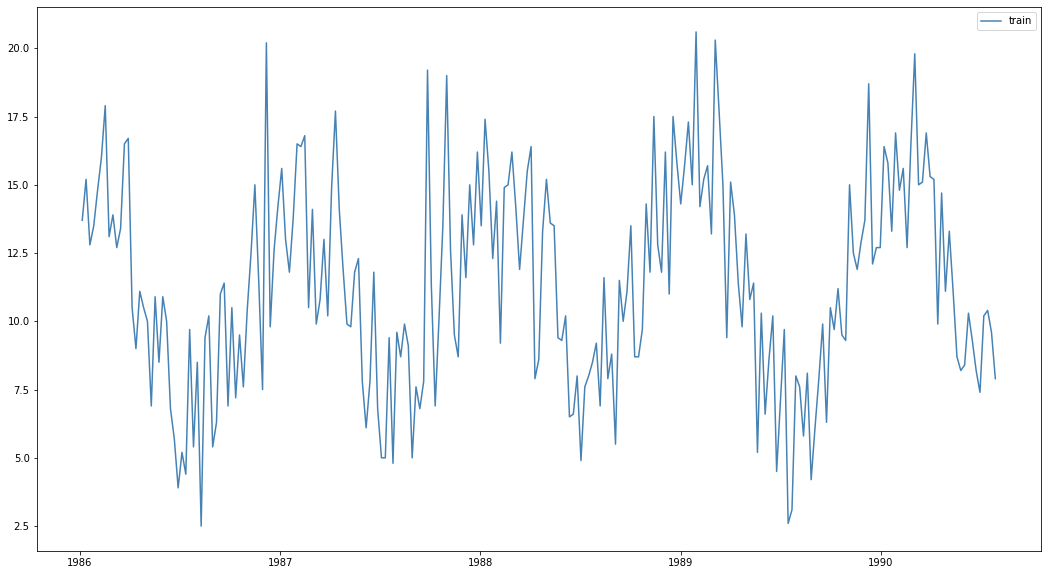

In [6]:
ts2.plot()

## Model 1

In [7]:
arima_model1 = pmdarima.arima.auto_arima(ts2.data, d = 1, max_d = 2
                         ,start_p = 0, max_p = 4
                         ,start_q = 0, max_q = 4
                         ,D = 1, max_D = 3
                         ,start_P = 0, max_P = 2
                         ,start_Q = 0, max_Q = 2
                         ,m = 27
                         ,seasonal = True
                         ,startionary = True
                         ,stepwise = False
                         ,trace = True
                         ,n_jobs = 5
                         ,random = True
                         ,n_fits = 25)


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


 ARIMA(0,1,2)(0,1,0)[27]             : AIC=1213.140, Time=0.19 sec
 ARIMA(1,1,3)(0,1,0)[27]             : AIC=1199.642, Time=0.74 sec
 ARIMA(2,1,0)(0,1,0)[27]             : AIC=1220.981, Time=0.15 sec
 ARIMA(3,1,0)(1,1,1)[27]             : AIC=inf, Time=8.11 sec
 ARIMA(1,1,2)(0,1,2)[27]             : AIC=inf, Time=30.49 sec


/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Best model:  ARIMA(1,1,1)(2,1,0)[27]          
Total fit time: 74.861 seconds


In [8]:
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 27)   Log Likelihood                -559.825
Date:                             Fri, 26 Aug 2022   AIC                           1129.650
Time:                                     04:17:52   BIC                           1146.409
Sample:                                          0   HQIC                          1136.425
                                             - 239                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0073      0.107     -0.068      0.946      -0.217       0.203
ma.L1         -0.7016      0.083     -8.422      0.000      -0.865      -0.538
ar.S.L27      -0.7023      0.080     -8.776      0.000      -0.859      -0.545
ar.S.L54      -0.1206      0.074     -1.625      0.104      -0.266       0.025
sigma2        10.9975      1.034     10.638      0.000       8.971      13.024
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.95   Prob(JB):                         0.70
Heteroskedasticity (H):               0.82   Skew:                            -0.08
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eval

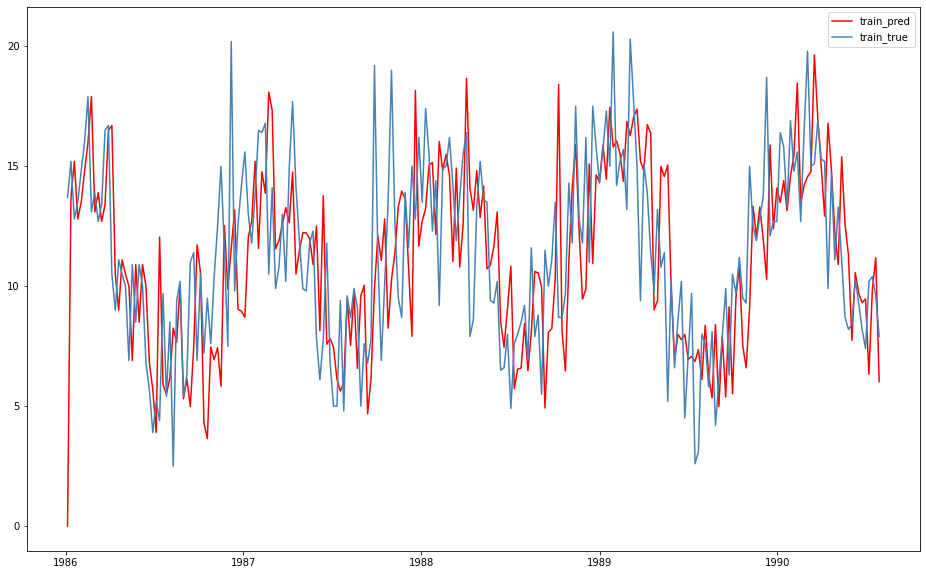

In [9]:
df_data_train = ts2.data
df_train_pred = pd.Series(arima_model1.predict_in_sample(), index = df_data_train.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_train_pred, label='train_pred', color='red')
plt.plot(ts2.data, label='train_true', color='steelblue')
plt.legend()

In [10]:
eval_model(ts2.data_1d(), df_train_pred)

{'MAE': 2.673104286008171,
 'MAPE': 0.27744151432528463,
 'MSE': 12.210931018902285,
 'over_est_0': 0.46443514644351463,
 'under_est_0': 0.5355648535564853,
 'R2': 0.14000297055580113}

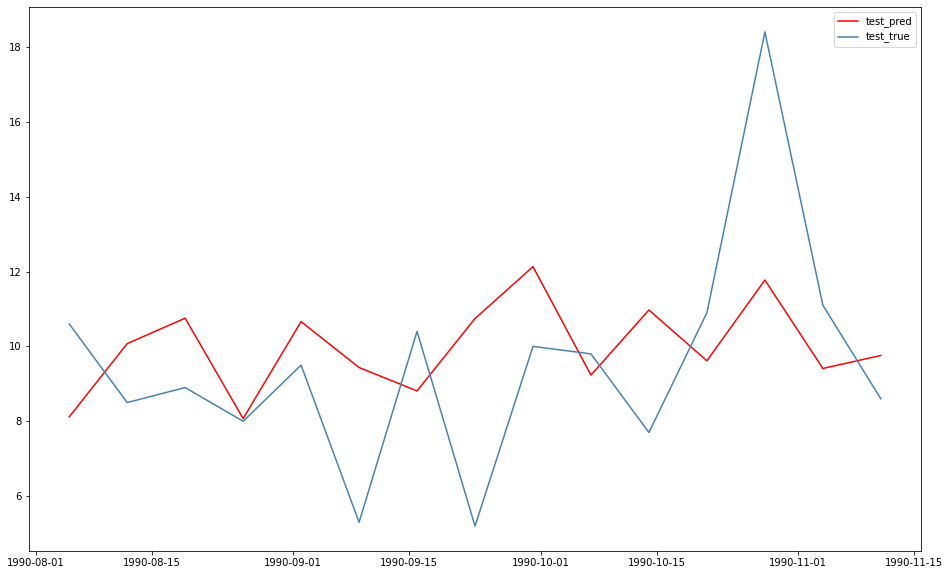

In [13]:
n_test = 15

df_data_test = ts2.data_test[:n_test]
df_test_pred = pd.Series(arima_model1.predict(n_periods=len(df_data_test)), index = df_data_test.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [14]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 2.3425961812636142,
 'MAPE': 0.2812367889283704,
 'MSE': 8.607972383203075,
 'over_est_0': 0.6,
 'under_est_0': 0.4,
 'R2': 0.005773091815007847}

 ARIMA(0,1,2)(1,1,2)[27]             : AIC=inf, Time=17.08 sec
 ARIMA(4,1,1)(0,1,0)[27]             : AIC=1213.544, Time=0.49 sec
 ARIMA(1,1,1)(0,1,2)[27]             : AIC=inf, Time=13.39 sec
 ARIMA(2,1,1)(2,1,0)[27]             : AIC=1131.470, Time=6.95 sec
 ARIMA(1,1,0)(2,1,0)[27]             : AIC=1159.487, Time=3.47 sec
 ARIMA(1,1,1)(2,1,0)[27]             : AIC=1129.650, Time=4.74 sec
 ARIMA(1,1,0)(0,1,0)[27]             : AIC=1228.360, Time=0.14 sec
 ARIMA(0,1,0)(2,1,2)[27]             : AIC=inf, Time=25.40 sec
 ARIMA(1,1,0)(1,1,1)[27]             : AIC=inf, Time=7.69 sec
 ARIMA(2,1,1)(1,1,1)[27]             : AIC=inf, Time=8.03 sec
 ARIMA(0,1,1)(2,1,2)[27]             : AIC=inf, Time=44.14 sec
 ARIMA(0,1,3)(0,1,0)[27]             : AIC=1213.532, Time=0.34 sec
 ARIMA(3,1,0)(0,1,0)[27]             : AIC=1213.241, Time=0.22 sec
 ARIMA(2,1,2)(0,1,1)[27]             : AIC=inf, Time=15.46 sec
 ARIMA(0,1,2)(0,1,2)[27]             : AIC=inf, Time=13.18 sec
 ARIMA(2,1,0)(2,1,1)[27]     